<a href="https://colab.research.google.com/github/krati-tam/Fake-Job-Prediction-Project/blob/main/Fake_Job_Posting_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fake_job_postings.csv to fake_job_postings (2).csv
User uploaded file "fake_job_postings.csv" with length 50061601 bytes


In [13]:
 # Reading Dataset
import pandas as pd
data = pd.read_csv("fake_job_postings (2).csv")

In [ ]:
# Reading top 5 rows of our dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data.shape

(17880, 18)

In [ ]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
# let us check the missing values in our dataset

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
# Let us remove the columns which are not necessary
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [ ]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data.shape

(17880, 13)

In [ ]:
# Fill NaN values with blank space
data.fillna(' ', inplace=True)

In [ ]:
data.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## **Exploratory Data Analysis**

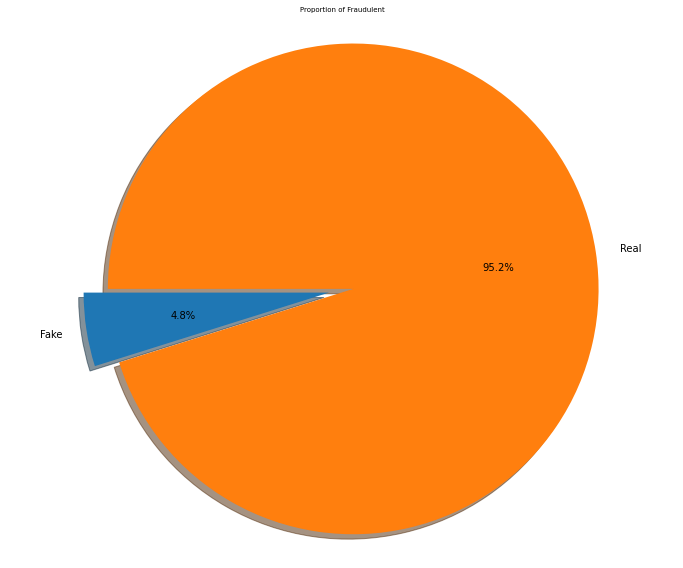

In [ ]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

**In the next step, we will visualize the number of job postings by countries and by experience**

In [ ]:
#Visualize job postings by countries
def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)

Text(0.5, 0, 'Countries')

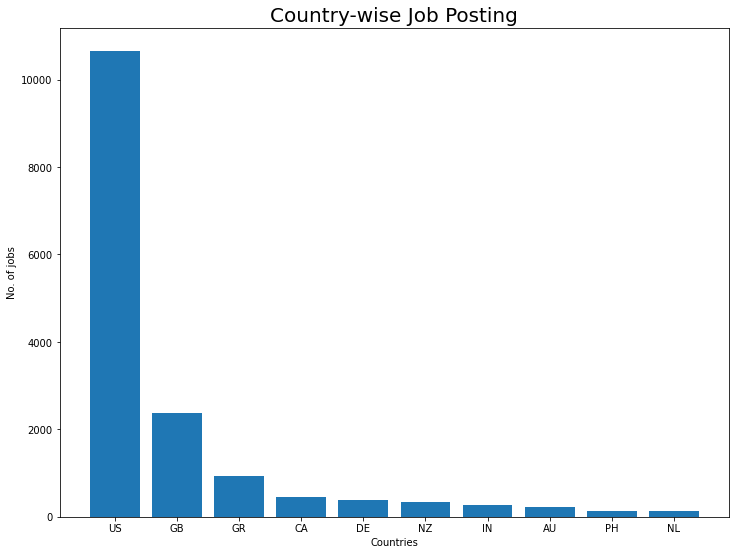

In [ ]:
country = dict(data.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

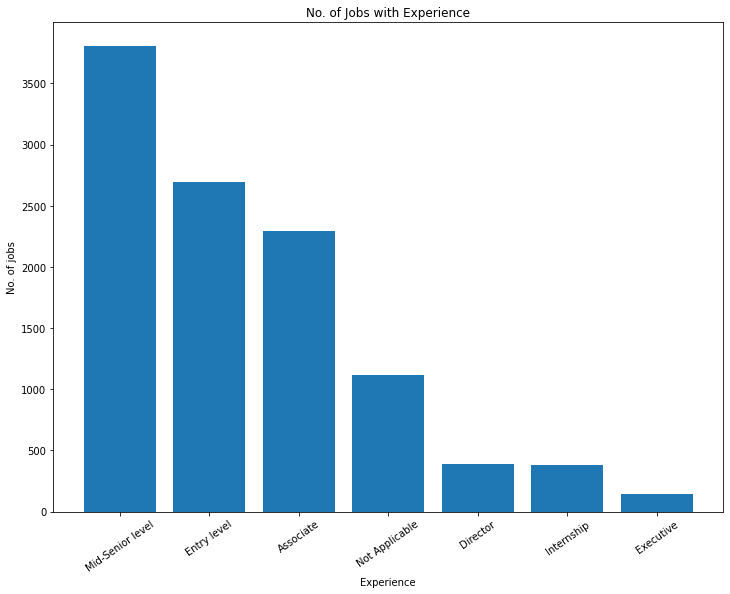

In [ ]:
#Visualize the required experiences in the jobs
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
#Most frequent jobs
print(data.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [ ]:
#Titles and count of fraudulent jobs
print(data[data.fraudulent==1].title.value_counts()[:10])

Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Name: title, dtype: int64


In [ ]:
#Titles and count of real jobs
print(data[data.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [ ]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [ ]:
#combine text in a single column to start cleaning our data
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [ ]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


**Understanding the common words used in the texts : Wordcloud**

In [ ]:
#Let's visualize all the words our data using the wordcloud plot

all_words = ''.join([text for text in data["text"]]) 
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

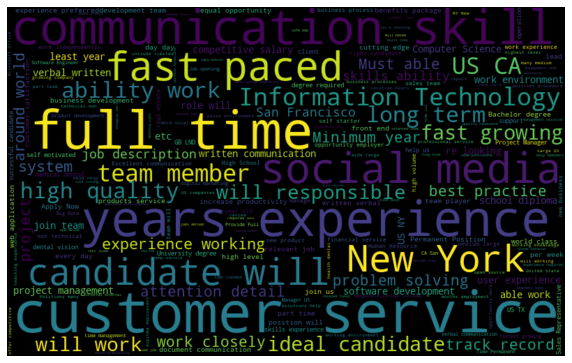

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)

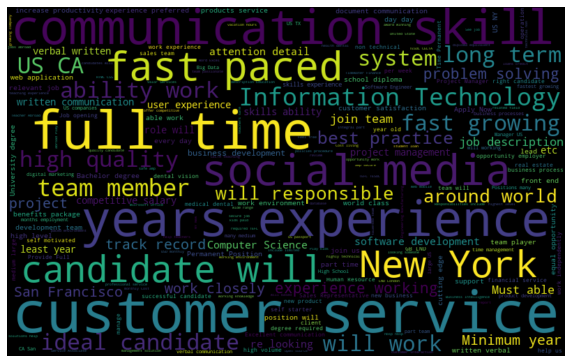

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

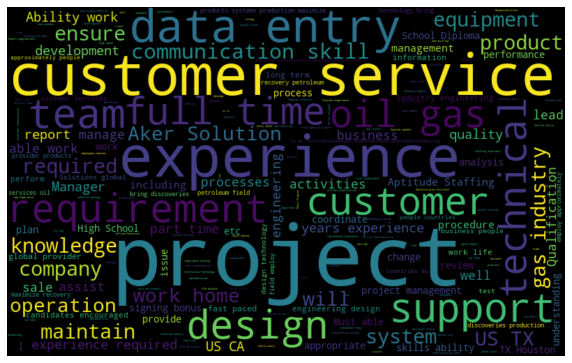

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Engineering/ Data Preparation 

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [ ]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#checking what all words are considered as stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [ ]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
data['text'][0]

"marketing intern us, ny, new york we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.we're located chelsea, new york city. food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging existing food

## Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix

In [ ]:
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

#Train-test shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(12516,)
(12516,)
(5364,)
(5364,)


In [ ]:
#  instantiate the vectorizer
vect = CountVectorizer()

In [ ]:
# learn training data vocabulary, then use it to create a document-term matrix

# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)

In [ ]:
# examine the document-term matrix
X_train_dtm

<12516x86205 sparse matrix of type '<class 'numpy.int64'>'
	with 2334564 stored elements in Compressed Sparse Row format>

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5364x86205 sparse matrix of type '<class 'numpy.int64'>'
	with 962544 stored elements in Compressed Sparse Row format>

In [ ]:
# Naive Bayes Classifier

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

In [ ]:
y_pred_nb = nb.predict(X_test_dtm)

In [ ]:
accuracy_score(y_test, y_pred_nb)

In [ ]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [ ]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: user 13.8 s, sys: 5.18 ms, total: 13.8 s
Wall time: 13.8 s


DecisionTreeClassifier()

In [ ]:
X_test

5446     warehouse staff @ pgi, food production company...
5165     administrative/clerical us, il, may answer tel...
11956    new product development project leader us, oh,...
225      settlements analyst gb, lnd, london marketinvo...
17598    real estate & insurance professionals us, ga, ...
                               ...                        
1327     recruiter/recruiting assistant us, ca, inglewo...
10560    customer analytics specialist gr, i, athens cu...
1903     nortel bcm field tech us, az, phoenix tel tech...
15285    electrical engineer us, mi, detroit provide fu...
484      experienced telemarketer wanted - digital solu...
Name: text, Length: 5364, dtype: object

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [ ]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))

Classification Accuracy: 0.9778150633855331
Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5078
           1       0.86      0.70      0.77       286

    accuracy                           0.98      5364
   macro avg       0.92      0.84      0.88      5364
weighted avg       0.98      0.98      0.98      5364

Confusion Matrix

[[5046   32]
 [  87  199]]


Text(69.0, 0.5, 'Truth')

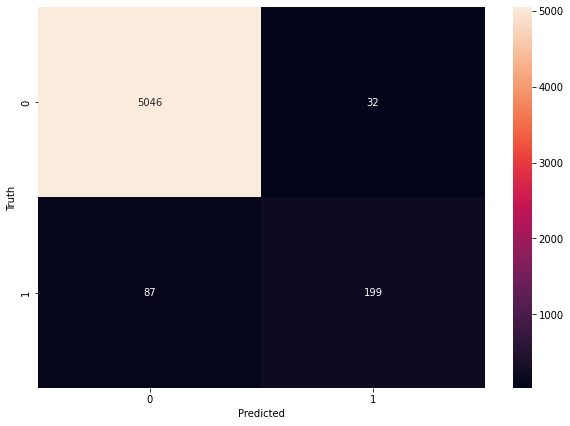

In [ ]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a Predictive System

In [ ]:
X_test

8485     application developer us, mi, detroit provide ...
8739     projektleder arein2media ever since early star...
13898    caregivers needed holidays! us, az, phoenix cu...
14414    part time cleaner- chelsea/dexter us, mi, chel...
11954    engineering intern be, vov, gent massive media...
                               ...                        
14962    clinical optometrists, portsmouth & southampto...
7072     project engineer gb, lnd, london middle east r...
11488    software engineer - frontend us, ma, cambridge...
4157     sales associate us, dc, washington data thing ...
8522     contact center representatives us, nv, las veg...
Name: text, Length: 5364, dtype: object

In [ ]:
input_text = ["new product development project leader us, oh, cincinnati provide full time permanent positions many medium large us companies. interested finding/recruiting high quality candidates it, engineering, manufacturing highly technical non-technical jobs. (we 1500 job openings website relevant job. feel free search website apply directly. click “apply now” redirect main website search jobs.)location - atlanta, ga, usajob type – permanentjob requirements &amp; responsibilities –specific responsibilitiescoordination project management new product development projects:act team leader perform project management duties new product development projects leading cross functional teams defined gated npd process.lead cross functional teams development project timeline maintain throughout life project. periodically present status project management.facilitate coordinate project activities minimize project timelines.assign alternate members find alternative resources personally complete project tasks team members absent unable complete tasks per timeline.develop manage project budget team including development expense capital tooling expense tooling.guide team develop new products meet cost targets. primarily responsible creating preliminary product cost estimates conjunction engineering. primarily responsible accuracy preliminary cost estimates final costing products.define roles &amp; responsibilities team members undefined processes new processes created unique instances occur.manage collection project data npd process gate exits release shipment documents.facilitate team meetings record meeting minutes.connect members appropriate personnel including manufacturing test labs legal etc.drive team manufacturing personnel supply chain towards time completion pilot build inventory build.education experience requirementsbachelor science degree engineering (or applicable four year degree) minimum eight years experience project management product design process engineering manufacturing engineering. alternately fifteen years experience proven ability related field work environment. experience managing projects working cross-functional team environment and/or functioning project team leader required. strong organizational communication skills required.visit - #url_ec64af2b4fe2ca316e828f93b0cd098c22f8beba98dcac09d4dd7384b221a5e8#-#url_2954b76adf23051d4bc35fc729f5a18c5de715ed82dfaee24b3aabbf3874ca57#"]

# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job
